#	Simulation Tool For Road Safety Exploratory Analysis : Tutorial

##	Python 3.7
The scripts used in this tool use Python coding language. The version used is Python 3.7. 

## Requirement

A file requirements.txt is available at the root of the project. It is required to be installed in order to use the tool.
To do so, run the following line in your shell :


# Creating a simulation world
##	Alignments
An alignment is an object of type moving.Trajectory. For example, if you want to make an alignment whose width equals 3.7m, starting form point A(0, 0) to point B(0, 500):

In [1]:
from trafficintelligence import moving 
import network

A = moving.Point(0,0)
B = moving.Point(0,500)
alignmentPoints = moving.Trajectory.fromPointList([A,B])

In the previous lines of codes we have generated the list of moving points which make up for the alignment.
An alignment has an unique id, and its width. They are attributed with the following lines:


In [2]:
alignment = network.Alignment(idx=0,
                              width=3.7,
                              points=alignmentPoints)

## Distributions
A Distribution is an object of network.distribution type. It is useful when creating a generator of users. A distribution object represents a statistic distribution by its parameters (mean, standard deviation, and constant in the case of a degenerated distribution, cumulative frequency curve, name, and type of distribution. 

Thus, each variable subjected to a random selection takes its parameters from this Distribution object.
For a user, it is necessary to instantiate the parameters tau, dn, headway, length, speed, criticalGap

In [10]:
distributions = {'dn': network.Distribution(cdf=None,
                                            degeneratedConstant=None,
                                            distributionName='norm', 
                                            distributionType='theoric', 
                                            loc=8.333333,
                                            scale=1),
                 'headway':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='expon', 
                                                distributionType='theoric', 
                                                loc=1.5,
                                                scale=2.1),
                 'length':network.Distribution(cdf=None,
                                               degeneratedConstant=None,
                                               distributionName='norm',
                                               distributionType='theoric',
                                               loc=7,
                                               scale=1),
                 'speed':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='norm', 
                                                distributionType='theoric', 
                                                loc=14,
                                                scale=3),
                 'tau':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='norm', 
                                                distributionType='theoric', 
                                                loc=2,
                                                scale=.5), 
                 'criticalGap':network.Distribution(cdf=None,
                                                degeneratedConstant=2,
                                                distributionName='norm', 
                                                distributionType='degenerated', 
                                                loc=None,
                                                scale=None),
                 'amberProbability':network.Distribution(cdf=None,
                                                degeneratedConstant=2,
                                                distributionName='norm', 
                                                distributionType='degenerated', 
                                                loc=None,
                                                scale=None),
                }


## User generators
A user generator is an object of type network.UserInput. It is an entry point on the network that assigns characteristics (vehicle length, dn, t, inter-vehicle time, desired speed) to the users produced from random distributions specific to each entry point.

The following line explains how to create a userInput and also how to link it to the previous created alignment.

In [11]:
userInput = network.UserInput(idx=0,
                              alignmentIdx=alignment.idx,
                              distributions=distributions)

## Control devices
A control device is an object of type network.ControlDevice. This data structure makes it possible to take into account stop signs, yield signs, as well as traffic lights. A control device is necessarily linked to an alignment. 

The user has to specify the duration each driver is going to spend at a control device in the case of a stop sign. In this example, the value is set to 2 sec.

A stop sign is created and linked to the previously created alignment.
The control devices are by default attached to the very end of the alignment.

In [12]:
controlDevice = network.StopSign(idx=0, alignmentIdx=0, timeAtStop=2)

## World
The 'world' is the data structure that brings together alignments, control devices, user generators, and users (the creation of these is explained later). It is necessary to add these attributes to the network.World object that had been created.



In [13]:
# création de l'objet World
world = network.World(alignments = [alignment],
                      controlDevices = [controlDevice], 
                       userInputs = [userInput])

Then preparing the world, links all the objects between them, and links the world to its representative graph

In [14]:
world.prepare()

A World has been created. It is now possible to generate users that will move along the alignments. Afterwards, it is possible to save the created world and then load it, thankds to the 'save' and 'load' methods of the network.World class.

![alt text](monde.png "monde dessin")





## Simulation parameters

The file 'config.yml' contains the configuration parameters needed in order to perform a simulation:

- duration: duration of a simulation (s)
- timeStep: step between each calculation of position (s)
- seed: parameter that definies the sequence of random values that will be generated

# Traffic simulation along a road

As a reminder: a portion of road is represented by a succession of alignments. In order to comnpute road traffic on an alignment, a userInput has to be defined and linked on an alignment. 

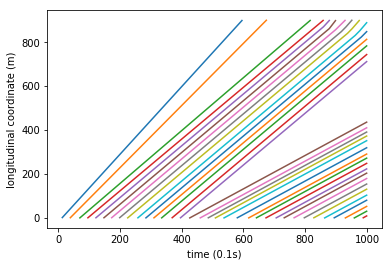

In [15]:
import simulation

world = network.World.load('simple-net.yml')
sim = simulation.Simulation.load('config.yml')   
sim.run(world)
world.plotUserTrajectories(sim.timeStep)

# Analysis of produced data

À venir